## 필수 실행 코드

In [ ]:
# 구글 드라이브를 마운트합니다.
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# 폴더 이동
import os
ROOT = '/content/gdrive/Shareddrives'  # 변경하지 마세요. 단, MyDrive가 오류난다면, My\ Drive로 적으세요.
DIR = 'NLP 토픽 분류/유하준'  # 데이터와 ipynb파일이 있는 위치를 적으세요.

PATH = os.path.join(ROOT, DIR)
os.chdir(PATH)

In [ ]:
# 할당 받은 GPU 확인
# Go to "Runtime" from the menu bar and then click on "Change Runtime Type", Select GPU as the Hardware Accelerator and click save. Then try and run the above command again.
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import re
# from hanja import hangul

from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras import Sequential

from tqdm import tqdm
import time

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras import Sequential

In [ ]:

from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import Adam

from keras.utils import np_utils

import warnings 
warnings.filterwarnings(action='ignore')

In [ ]:
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')
submission = pd.read_csv('./sample_submission.csv')

In [ ]:
topic_dict = pd.read_csv('./topic_dict.csv')

 -----------------------------------
 

In [ ]:
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [ ]:
train.describe()

,index,topic_idx
count,45654.000000,45654.000000
mean,22826.500000,3.163622
std,13179.318932,1.932897
min,0.000000,0.000000
25%,11413.250000,2.000000
50%,22826.500000,3.000000
75%,34239.750000,5.000000
max,45653.000000,6.000000


In [ ]:
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [ ]:
test.describe()

,index
count,9131.000000
mean,50219.000000
std,2636.036988
min,45654.000000
25%,47936.500000
50%,50219.000000
75%,52501.500000
max,54784.000000


In [ ]:
submission.head()

,index,topic_idx
0,45654,2
1,45655,3
2,45656,2
3,45657,2
4,45658,3


In [ ]:
# topic idx와 실제 topic
topic_dict.head()

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4


In [ ]:
topic_dict.topic.unique()

array(['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'], dtype=object)

In [ ]:
topic_dict.topic_idx.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
train_merge = pd.merge(train, topic_dict, how = 'left', on=['topic_idx']) 
train_merge

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,세계
...,...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1,경제
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2,사회
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1,경제
45652,45652,답변하는 배기동 국립중앙박물관장,2,사회


## Train topic 분포 확인

<BarContainer object of 7 artists>

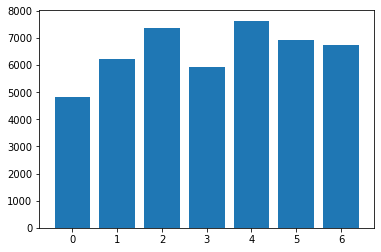

In [ ]:
grouped = train_merge['topic_idx'].value_counts()
plt.bar(list(grouped.index), list(grouped.values))

In [ ]:
train['text length'] = train['title'].apply(lambda x : len(x))

In [ ]:
train.head()

,index,title,topic_idx,text length
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,24
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4,30
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,30
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4,32
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,25


In [ ]:
topic_length_mean = train['text length'].groupby(train['topic_idx']).mean()

topic_idx
0    27.511816
1    27.325940
2    26.458571
3    24.721389
4    28.960939
5    28.785951
6    27.112132
Name: text length, dtype: float64

<BarContainer object of 7 artists>

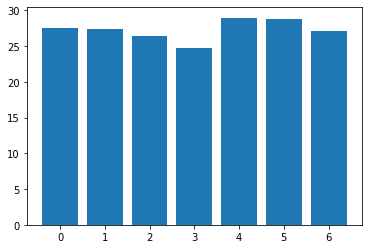

In [ ]:
display(topic_length_mean)
plt.bar(list(topic_length_mean.index), list(topic_length_mean.values))

In [ ]:
topic_length_max = train['text length'].groupby(train['topic_idx']).max()
topic_length_max

topic_idx
0    44
1    43
2    44
3    44
4    41
5    42
6    41
Name: text length, dtype: int64

<BarContainer object of 7 artists>

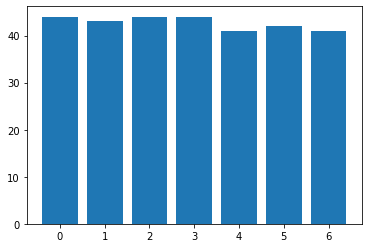

In [ ]:
plt.bar(list(topic_length_max.index), list(topic_length_max.values))

In [ ]:
test_merge = pd.merge(test, submission, how = 'left', on=['index']) 
test_merge 

,index,title,topic_idx
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영,2
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,3
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다,2
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,2
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,3
...,...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,3
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,3
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,3
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,2


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


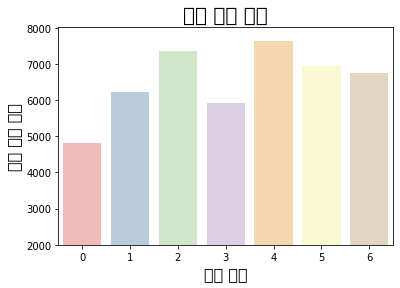

<Figure size 432x288 with 0 Axes>

In [ ]:
# 한글 깨질경우 런타임 다시 시작 해주세요!
sns.countplot(train['topic_idx'], palette='Pastel1')

plt.title('타깃 라벨 분포', fontsize=20)
plt.rc('font', family='NanumBarunGothic')
plt.xlabel('뉴스 분야', fontsize=16)
plt.ylabel('해당 뉴스 개수', fontsize=16)
plt.ylim(2000, )

plt.show()
plt.savefig('target_distribution.png')

## 데이터 전처리 

- 화살표, …, ①과 같은 특수 기호 생략해도 될듯

- 토픽분류니까 한국어와 영어만

- re 모듈을 통한 정규 표현식 적용

In [ ]:
# https://dacon.io/competitions/official/235747/codeshare/3074?page=1&dtype=recent
# 처리 시간 너무 오래걸림.. 다른 방법 찾으면 더욱 좋을듯
# 라벨링 
# dictionary
def clean_text(texts):
    corpus = []
    for i in tqdm(range(0, len(texts))):
        texts[i] = texts[i].replace("外人","외국인")
        texts[i] = texts[i].replace("日","일본")
        texts[i] = texts[i].replace("美","미국")
        texts[i] = texts[i].replace("北","북한")
        texts[i] = texts[i].replace("英","영국")
        texts[i] = texts[i].replace("中","중국")
        texts[i] = texts[i].replace("與","여당")
        texts[i] = texts[i].replace("靑","청와대")
        texts[i] = texts[i].replace("野","야당")
        texts[i] = texts[i].replace("伊","이탈리아")
        texts[i] = texts[i].replace("韓","한국")
        texts[i] = texts[i].replace("南","한국")
        texts[i] = texts[i].replace("獨","독일")
        texts[i] = texts[i].replace("佛","프랑스")
        texts[i] = texts[i].replace("檢","검찰")
        texts[i] = texts[i].replace("銀","은행")
        texts[i] = texts[i].replace("亞","아시아")
        texts[i] = texts[i].replace("人","사람")
        texts[i] = texts[i].replace("孫","손혜원")
        texts[i] = texts[i].replace("企","기업")
        texts[i] = texts[i].replace("前","이전")
        texts[i] = texts[i].replace("反","반대")
        texts[i] = texts[i].replace("安","안철수")
        texts[i] = texts[i].replace("展","전시회")
        texts[i] = texts[i].replace("故","사망")
        texts[i] = texts[i].replace("文","문재인")
        texts[i] = texts[i].replace("新","새로운")
        texts[i] = texts[i].replace("曺","조국")
        texts[i] = texts[i].replace("朴","박근혜")
        texts[i] = texts[i].replace("株","주식")
        texts[i] = texts[i].replace("男","남자")
        texts[i] = texts[i].replace("硏","연구")
        texts[i] = texts[i].replace("車","자동차")
        texts[i] = texts[i].replace("軍","군대")
        texts[i] = texts[i].replace("重","중공업")       

        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'1보','', str(review))
        review = re.sub(r'\d+','', str(review))# remove number
        review = re.sub(r'→','에서 ', str(review))
        review = re.sub(r'…',' ', str(review))
        review = re.sub(r'NYT','뉴욕 타임스', str(review))
        review = re.sub(r'KAIST','카이스트', str(review))
        review = re.sub(r'WMO','세계 기상 기구', str(review))
        review = re.sub(r'KBL','한국 프로 농구', str(review))
        review = re.sub(r'UAE','아랍에미리트', str(review))
        review = re.sub(r'EU','유럽 연합', str(review))
        review = re.sub(r'NBA','농구 연맹', str(review))
        review = re.sub(r'CIA','중앙정보국', str(review))
        review = re.sub(r'ECB','유럽 중앙 은행', str(review))
        review = re.sub(r'AFC','아시아 축구 연맹', str(review))
        review = re.sub(r'ITU','국제전기통신연합', str(review))
        review = re.sub(r'MVP','최우수 선수', str(review))
        #review = re.sub(r'MB','이명박', str(review))
        review = re.sub(r'APEC','아시아 태평량 경제협력체', str(review))
        review = re.sub(r'PSG','파리 셍제르망', str(review))
        review = re.sub(r'IMO','국제해사기구', str(review))
        review = re.sub(r'MLB','프로 야구 리그 ', str(review))
        review = re.sub(r'MOU','양해각서', str(review))
        review = re.sub(r'FA','자유계약선수제도', str(review))
        review = re.sub(r'EPL','잉글랜드프리미어리그', str(review))
        review = re.sub(r'KBO','한국야구위원회', str(review))
        review = re.sub(r'IPU','국제 의회 연맹', str(review))
        review = re.sub(r'AG','아시안게임', str(review))
        review = re.sub(r'PS','포스트시즌', str(review))
        review = re.sub(r'PO','플레이오프', str(review))
        #review = re.sub(r'닷컴','사이트', str(review))
        review = re.sub(r'OUT','방출', str(review))
        review = re.sub(r'IN','영입', str(review))
        review = re.sub(r'TPP',' 환태평양 경제 동반자협정', str(review))
        review = re.sub(r'EAS','동아시아 정상회의', str(review))
        review = re.sub(r'DC','', str(review))
        review = re.sub(r'①','', str(review))
        review = re.sub(r'②','', str(review))
        review = re.sub(r'⑤','', str(review))
        review = re.sub(r'·',' 및 ', str(review))
        #sent = re.sub(r'G20','', str(sent))
        review = re.sub(r'↑','상승 ', str(review))
        review = re.sub(r'↓','하락 ', str(review))
        review = re.sub(r'ITF','국제태권도연맹 ', str(review))
        review = re.sub(r'IS','이슬람 ', str(review))
        review = re.sub(r'러','러시아 ', str(review))
        review = re.sub(r'W농구','한국여자농구', str(review))
        review = re.sub(r'C팰리스','크리스탈팰리스', str(review))
        review = re.sub(r'SLBM','잠수함발사탄도미사일', str(review))
        review = re.sub(r'VNL','배구네이션스리그', str(review))
        #sent = re.sub(r'D','하루전', str(sent))
        review = re.sub(r'LA타임스','로스엔젤레스타임스', str(review))
        review = re.sub(r'V리그','배구리그', str(review))
        review = re.sub(r'KOVO','한국배구연맹', str(review))
        review = re.sub(r'ℓ','리터', str(review))
        review = re.sub(r'SUN','선동열', str(review))
        review = re.sub(r'WSJ',' 월스트리트 저널', str(review))
        review = re.sub(r'ERA',' 평균자책점', str(review))
        review = re.sub(r'IoT',' 사물인터넷', str(review))
        review = re.sub(r'QS',' 선발 6이닝 이상 3자책점 이하 투구', str(review))
        review = re.sub(r'NL','내셔널리그', str(review))
        review = re.sub(r'UFG20','한미 합동 군사', str(review))
        review = re.sub(r'F35','전투기', str(review))
        review = re.sub(r'WP','워싱턴포스트', str(review))
        review = re.sub(r'TK','대구와 경북', str(review))
        review = re.sub(r'ACL','아시아축구연맹 챔피언스리그', str(review))
        review = re.sub(r'IT','정보기술', str(review))
        review = re.sub(r'AI','인공지능', str(review))
        review = re.sub(r'TF','태스크포스', str(review))
        review = re.sub(r'ML','메이저리그', str(review))
        review = re.sub(r'FC','축구 클럽', str(review))
        review = re.sub(r'SI','스포츠 일러스트레이티드', str(review))
        review = re.sub(r'㈜','', str(review))
        review = re.sub(r'MS','마이크로소프트', str(review))
        review = re.sub(r'SNS','소셜 네트워크 서비스', str(review))
        review = re.sub(r'B52','', str(review))
        review = re.sub(r'VR','가상현실', str(review))
        review = re.sub(r'ELB','주가연계파생결합사채', str(review))
        review = re.sub(r'CES','국제전자제품박람회', str(review))
        review = re.sub(r'NPL','부실채권', str(review))
        review = re.sub(r'IPO','기업공개', str(review))
        review = re.sub(r'ERA','방어율', str(review))
        review = re.sub(r'MWC','모바일 산업 박람회', str(review))
        review = re.sub(r'NSC','국가안전보장회의', str(review))
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        review = re.sub("[一-龥]",'', review)
        corpus.append(review)
    return corpus

In [ ]:
# 한글이 아닌 것을 공백(white space)으로 교체
def clean_text_kor(inputString):
  text_kor = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', inputString)
  text_kor = ' '.join(text_kor.split())
  return text_kor

# 영어가 아닌 것을 공백으로 교체
def clean_text_eng(inputString):
  text_eng = re.sub('[^A-Za-z]', ' ', inputString)
  text_eng = ' '.join(text_eng.split())
  return text_eng

### 일일이 replace 하기

- 영어가 아닌 것은 공백으로 대체, 한글로 대체

In [ ]:
train['cleaned_title'] = clean_text(train['title'])
test['cleaned_title'] = clean_text(test['title'])

100%|██████████| 9131/9131 [00:51<00:00, 176.41it/s]


In [ ]:
train['cleaned_title_kor'] = train['title'].apply(lambda x: clean_text_kor(x))
test['cleaned_title_kor'] = test['title'].apply(lambda x: clean_text_kor(x))

train['cleaned_title_eng'] = train['title'].apply(lambda x: clean_text_eng(x))
test['cleaned_title_eng'] = test['title'].apply(lambda x: clean_text_eng(x))

In [ ]:
train

,index,title,topic_idx,cleaned_title,cleaned_title_kor,cleaned_title_eng
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천에서 핀란드 항공기 결항 휴가철 여행객 분통,인천 핀란드 항공기 결항 휴가철 여행객 분통,
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 미국전역 거점화,4,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,
3,3,NYT 클린턴 측근한국기업 특수관계 조명…공과 사 맞물려종합,4,뉴욕 타임스 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,NYT
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,시진핑 트럼프에 중미 무역협상 조속 타결 희망,
...,...,...,...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1,kb금융 미국 ib 스티펠과 제휴 선진국 시장 공략,금융 미국 스티펠과 제휴 선진국 시장 공략,KB IB
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2,서울시교육청 신종코로나 확산에 개학 연기 및 휴업 검토,보 서울시교육청 신종코로나 확산에 개학 연기 휴업 검토,
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1,게시판 키움증권 키움 영웅전 실전투자대회,게시판 키움증권 키움 영웅전 실전투자대회,
45652,45652,답변하는 배기동 국립중앙박물관장,2,답변하는 배기동 국립중앙박물관장,답변하는 배기동 국립중앙박물관장,


In [ ]:
# train.drop(columns = 'cleaned_kor_text_length', inplace = True)

In [ ]:
train['cleaned_kor_text_length'] = train['cleaned_title_kor'].apply(lambda x : len(x))


In [ ]:
train['cleaned_eng_text_length'] = train['cleaned_title_eng'].apply(lambda x : len(x))

In [ ]:
train.head()
# 텍스트 길이가 줄어들기는 했다
# 하지만 일부는 그대로인데 
# 그 이유는 한글로만 이루어져 있는 것들이 있기 때문
# 공백 대신 특수기호를 쓰는 것도 공백으로 대체되도 글자 길이는 줄어들지 않는다. 
# 영어는 정말 희소한 것을 알 수 있다. 

,index,title,topic_idx,cleaned_title,cleaned_title_kor,cleaned_title_eng,cleaned_kor_text_length,cleaned_eng_text_length
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천에서 핀란드 항공기 결항 휴가철 여행객 분통,인천 핀란드 항공기 결항 휴가철 여행객 분통,,24,0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 미국전역 거점화,4,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,,29,0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,,30,0
3,3,NYT 클린턴 측근한국기업 특수관계 조명…공과 사 맞물려종합,4,뉴욕 타임스 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,NYT,29,3
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,시진핑 트럼프에 중미 무역협상 조속 타결 희망,,25,0


In [ ]:
len(train['title'].unique())

45653

In [ ]:
len(train['cleaned_title_kor'].unique())

45530

In [ ]:
len(train['cleaned_title_eng'].unique()) 
# 영어만 남기는 것이 의미가 있는가? 
# 굉장히 sparse함 => 영어만 들어 있는 것이 생각보다 너무 희소하다.
# 꼭 필요한지 검토해볼 필요 있음

2016

In [ ]:
# cleaned_topic_length_mean = train['cleaned_kor_text_length'].groupby(train['topic_idx']).mean()
# display(cleaned_topic_length_mean)
# display(topic_length_mean)

In [ ]:
# eng_topic_length_mean = train['cleaned_eng_text_length'].groupby(train['topic_idx']).mean()
# eng_topic_length_mean
# # 영어는 토픽별 길이도 짧다......

# 형태소 분석기와 분절
한국어 : KoNLPy(Mecab) 영어 : nltk



### konlpy & mecab install

In [ ]:
import os

# install konlpy, jdk, JPype
!pip install konlpy
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

# install mecab-ko
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
!tar zxfv mecab-0.996-ko-0.9.2.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.2')
!./configure
!make
!make check
!make install

# install mecab-ko-dic
!apt-get install automake
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz
!tar -zxvf mecab-ko-dic-2.1.1-20180720.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.1.1-20180720')
!./autogen.sh
!./configure
!make
!make install

# install mecab-python
os.chdir('/content')
!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')
!python3 setup.py build
!python3 setup.py install

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 39.6 MB/s 
     |████████████████████████████████| 88 kB 3.5 MB/s 
  Created wheel for JPype1-py3: filename=JPype1_py3-0.5.5.4-cp37-cp37m-linux_x86_64.whl size=2695765 sha256=d3a795a8afb1d84550ae0b3ba0225c4f5e9d5ac27cdc280bc2828d1737b058be
  Stored in directory: /root/.cache/pip/wheels/e7/d1/09/f55dca0203b0691945bdf0f63d486a0b4d4e5ec4bd78a2502e
Successfully built JPype1-py3
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2607k      0 --:--:-- --:--:-- --:--:-- 2607k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/example.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.c
mecab-0.996-k

### nltk 토큰화

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize



In [ ]:
train['title_nltk_token'] = train['cleaned_title_kor'].apply(lambda x: word_tokenize(x))
test['title_nltk_token'] = test['cleaned_title_kor'].apply(lambda x: word_tokenize(x))

In [ ]:
train

,index,title,topic_idx,text length,cleaned_title,cleaned_title_kor,cleaned_title_eng,cleaned_kor_text_length,cleaned_eng_text_length,title_nltk_token
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,24,인천에서 핀란드 항공기 결항 휴가철 여행객 분통,인천 핀란드 항공기 결항 휴가철 여행객 분통,,24,0,"[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]"
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 미국전역 거점화,4,30,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,,29,0,"[실리콘밸리, 넘어서겠다, 구글, 조원, 들여, 미국전역, 거점화]"
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,30,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,,30,0,"[이란, 외무, 긴장완화, 해결책은, 미국이, 경제전쟁, 멈추는, 것]"
3,3,NYT 클린턴 측근한국기업 특수관계 조명…공과 사 맞물려종합,4,32,뉴욕 타임스 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,NYT,29,3,"[클린턴, 측근한국기업, 특수관계, 조명, 공과, 사, 맞물려종합]"
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,25,시진핑 트럼프에 중미 무역협상 조속 타결 희망,시진핑 트럼프에 중미 무역협상 조속 타결 희망,,25,0,"[시진핑, 트럼프에, 중미, 무역협상, 조속, 타결, 희망]"
...,...,...,...,...,...,...,...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1,28,kb금융 미국 ib 스티펠과 제휴 선진국 시장 공략,금융 미국 스티펠과 제휴 선진국 시장 공략,KB IB,23,5,"[금융, 미국, 스티펠과, 제휴, 선진국, 시장, 공략]"
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2,31,서울시교육청 신종코로나 확산에 개학 연기 및 휴업 검토,보 서울시교육청 신종코로나 확산에 개학 연기 휴업 검토,,30,0,"[보, 서울시교육청, 신종코로나, 확산에, 개학, 연기, 휴업, 검토]"
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1,27,게시판 키움증권 키움 영웅전 실전투자대회,게시판 키움증권 키움 영웅전 실전투자대회,,22,0,"[게시판, 키움증권, 키움, 영웅전, 실전투자대회]"
45652,45652,답변하는 배기동 국립중앙박물관장,2,17,답변하는 배기동 국립중앙박물관장,답변하는 배기동 국립중앙박물관장,,17,0,"[답변하는, 배기동, 국립중앙박물관장]"


### 한국어 토큰화

In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
import konlpy
from konlpy.tag import Mecab
# from konlpy.tag import Okt

tokenizer = Mecab()
# tokenizer = Okt()

# Mecab tokenizer을 사용

## 형태소 단위 토큰화 함수
# def tokenize(inputString):
#   return tokenizer.morphs(inputString)

In [ ]:
# 태깅 이후 불용어 제거 (조사 등 제거)
tokenized_data = []
for sentence in tqdm(train['cleaned_title_kor']):
    tokenized_sentence = tokenizer.morphs(sentence) # mecab을 활용한 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)


100%|██████████| 45654/45654 [00:04<00:00, 10810.53it/s]


텍스트의 최대 길이 : 19
텍스트의 평균 길이 : 9.435777806982959


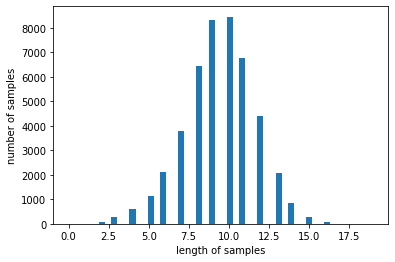

In [ ]:
# 토큰화 길이 분포 확인
print('텍스트의 최대 길이 :',max(len(text) for text in tokenized_data))
print('텍스트의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 불용어 제거 (형태소 위주)

In [ ]:
import konlpy
from konlpy.tag import Mecab

tokenizer = Mecab()

In [ ]:
stop_tag_list = ['NNB', 'NP', 'VCP', 'VCN', 'MM', 'MAG', 'IC', 'JKS', 'JKC', 'JKG', 'JKO', 
                 'JKB', 'JKV', 'JKQ', 'JC', 'JX', 'EP', 'EF', 'EC', 'ETN', 'ETM', 
                 'XPN', 'XSN', 'XSV', 'XSA', 'SF', 'SE', 'SS', 'SL', 'SN']

In [ ]:
stopwords = pd.read_csv('./stopwords-ko.txt', names = ['words']  ,sep='\n', encoding='UTF8')
stopwords.head()

,words
0,가
1,가까스로
2,가령
3,각
4,각각


In [ ]:
stopwords_list = list(stopwords['words'].values)
stopwords_list[:5]

['가', '가까스로', '가령', '각', '각각']

##### 어미 & 조사 제거

* 한국어 품사 및 태그 : http://incredible.ai/nlp/2016/12/28/NLP/

* 제거할 품사 태그
  * NNB, NP (의존명사, 대명사)
  * VCP, VCN (긍정, 부정 지정사)
  * MM (관형사)
  * MAG (일반 부사)
  * IC (감탄사)
  * 조사 : JKS, JKC, JKG, JKO, JKB, JKV, JKQ, JC, JX
  * 어미 : EP, EF, EC, ETN, ETM, XPN, XSN, XSV, XSA
  * 문장부호 : SF, SE, SS
  * 외국어숫자 : SL, SN

동사/형용사는 제거해야할지..?

In [ ]:
# 태그 없이 그냥 tokenize하기
def tokenize(inputString):
  return tokenizer.morphs(inputString)

def tokenize_tag_remove(inputString):
  tagged = tokenizer.pos(inputString)

  tmp = []
  for tag in tagged:
    if (tag[1] in stop_tag_list) or (tag[1] in stopwords_list):
      continue
    tmp.append(tag[0])
  
  return tmp

In [ ]:
train['title_tagged'] = train['cleaned_title_kor'].apply(lambda x: tokenize(x))
test['title_tagged'] = test['cleaned_title_kor'].apply(lambda x: tokenize(x))

train['title_tagged_cleaned'] = train['cleaned_title_kor'].apply(lambda x: tokenize_tag_remove(x))
test['title_tagged_cleaned'] = test['cleaned_title_kor'].apply(lambda x: tokenize_tag_remove(x))

In [ ]:
train.head()

,index,title,topic_idx,cleaned_title,cleaned_title_kor,cleaned_title_eng,cleaned_kor_text_length,cleaned_eng_text_length,title_tagged,title_tagged_cleaned
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천에서 핀란드 항공기 결항 휴가철 여행객 분통,인천 핀란드 항공기 결항 휴가철 여행객 분통,,24,0,"[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]","[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]"
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 미국전역 거점화,4,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,,29,0,"[실리콘밸리, 넘어서, 겠, 다, 구글, 조원, 들여, 미국, 전역, 거점, 화]","[실리콘밸리, 넘어서, 구글, 조원, 들여, 미국, 전역, 거점]"
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,,30,0,"[이란, 외무, 긴장, 완화, 해결책, 은, 미국, 이, 경제, 전쟁, 멈추, 는, 것]","[이란, 외무, 긴장, 완화, 해결책, 미국, 경제, 전쟁, 멈추]"
3,3,NYT 클린턴 측근한국기업 특수관계 조명…공과 사 맞물려종합,4,뉴욕 타임스 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,NYT,29,3,"[클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 사, 맞물려, 종합]","[클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 사, 맞물려, 종합]"
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,시진핑 트럼프에 중미 무역협상 조속 타결 희망,,25,0,"[시진핑, 트럼프, 에, 중미, 무역, 협상, 조속, 타결, 희망]","[시진핑, 트럼프, 중미, 무역, 협상, 조속, 타결, 희망]"


In [ ]:
# train['title_morph_tagged'] = train['cleaned_title_kor'].apply(lambda x: tokenize(x))
# test['title_morph_tagged'] = test['cleaned_title_kor'].apply(lambda x: tokenize(x))

In [ ]:
# train['title_morph_tagged'] = tokenized_data

In [ ]:
test.head()

,index,title,cleaned_title,cleaned_title_kor,cleaned_title_eng,title_tagged,title_tagged_cleaned
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영,유튜브 내달 일까지 크리에이터 지원 공간 운영,유튜브 내달 일까지 크리에이터 지원 공간 운영,,"[유튜브, 내달, 일, 까지, 크리에이터, 지원, 공간, 운영]","[유튜브, 내달, 일, 크리에이터, 지원, 공간, 운영]"
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사,,"[어버이날, 맑, 다가, 흐려져, 남부, 지방, 옅, 은, 황사]","[어버이날, 맑, 흐려져, 남부, 지방, 옅, 황사]"
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가rd 평가 때 논문건수는 반영 않는다,내년부터 국가 평가 때 논문건수는 반영 않는다,RD,"[내년, 부터, 국가, 평가, 때, 논문, 건수, 는, 반영, 않, 는다]","[내년, 국가, 평가, 때, 논문, 건수, 반영, 않]"
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,,"[김명자, 신임, 과, 총, 회장, 원로, 와, 젊, 은, 과학자, 지혜, 모을, 것]","[김명자, 신임, 과, 회장, 원로, 젊, 과학자, 지혜, 모을]"
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간,,"[회색, 인간, 작가, 김동식, 양, 심, 고, 백, 등, 새, 소설, 집, 권, 출간]","[회색, 인간, 작가, 김동식, 심, 백, 등, 소설, 집, 출간]"


태깅 이후 불용어 제거 (조사 등 제거)

뉴스 헤드라인에서는 명사 위주로 쓰임 => .noun으로 추출

In [ ]:
def tokenize_noun(inputString):
  return tokenizer.nouns(inputString)

train['title_noun'] = train['cleaned_title_kor'].apply(lambda x: tokenize_noun(x))
test['title_noun'] = test['cleaned_title_kor'].apply(lambda x: tokenize_noun(x))

In [ ]:
train.head()

,index,title,topic_idx,cleaned_title,cleaned_title_kor,cleaned_title_eng,cleaned_kor_text_length,cleaned_eng_text_length,title_tagged,title_tagged_cleaned,title_noun
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천에서 핀란드 항공기 결항 휴가철 여행객 분통,인천 핀란드 항공기 결항 휴가철 여행객 분통,,24,0,"[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]","[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]","[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]"
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 미국전역 거점화,4,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,,29,0,"[실리콘밸리, 넘어서, 겠, 다, 구글, 조원, 들여, 미국, 전역, 거점, 화]","[실리콘밸리, 넘어서, 구글, 조원, 들여, 미국, 전역, 거점]","[실리콘밸리, 구글, 조원, 미국, 전역, 거점]"
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,,30,0,"[이란, 외무, 긴장, 완화, 해결책, 은, 미국, 이, 경제, 전쟁, 멈추, 는, 것]","[이란, 외무, 긴장, 완화, 해결책, 미국, 경제, 전쟁, 멈추]","[이란, 외무, 긴장, 완화, 해결책, 미국, 경제, 전쟁, 것]"
3,3,NYT 클린턴 측근한국기업 특수관계 조명…공과 사 맞물려종합,4,뉴욕 타임스 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,NYT,29,3,"[클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 사, 맞물려, 종합]","[클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 사, 맞물려, 종합]","[클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 종합]"
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,시진핑 트럼프에 중미 무역협상 조속 타결 희망,,25,0,"[시진핑, 트럼프, 에, 중미, 무역, 협상, 조속, 타결, 희망]","[시진핑, 트럼프, 중미, 무역, 협상, 조속, 타결, 희망]","[시진핑, 트럼프, 중미, 무역, 협상, 조속, 타결, 희망]"


In [ ]:
test.head()

,index,title,cleaned_title,cleaned_title_kor,cleaned_title_eng,title_tagged,title_tagged_cleaned,title_noun
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영,유튜브 내달 일까지 크리에이터 지원 공간 운영,유튜브 내달 일까지 크리에이터 지원 공간 운영,,"[유튜브, 내달, 일, 까지, 크리에이터, 지원, 공간, 운영]","[유튜브, 내달, 일, 크리에이터, 지원, 공간, 운영]","[유튜브, 내달, 일, 크리에이터, 지원, 공간, 운영]"
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사,,"[어버이날, 맑, 다가, 흐려져, 남부, 지방, 옅, 은, 황사]","[어버이날, 맑, 흐려져, 남부, 지방, 옅, 황사]","[어버이날, 남부, 지방, 황사]"
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가rd 평가 때 논문건수는 반영 않는다,내년부터 국가 평가 때 논문건수는 반영 않는다,RD,"[내년, 부터, 국가, 평가, 때, 논문, 건수, 는, 반영, 않, 는다]","[내년, 국가, 평가, 때, 논문, 건수, 반영, 않]","[내년, 국가, 평가, 때, 논문, 건수, 반영]"
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,,"[김명자, 신임, 과, 총, 회장, 원로, 와, 젊, 은, 과학자, 지혜, 모을, 것]","[김명자, 신임, 과, 회장, 원로, 젊, 과학자, 지혜, 모을]","[김명자, 신임, 과, 회장, 원로, 과학자, 지혜, 것]"
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간,,"[회색, 인간, 작가, 김동식, 양, 심, 고, 백, 등, 새, 소설, 집, 권, 출간]","[회색, 인간, 작가, 김동식, 심, 백, 등, 소설, 집, 출간]","[회색, 인간, 작가, 김동식, 양, 백, 등, 소설, 집, 출간]"


## 워드 클라우드 시각화

In [ ]:
from wordcloud import WordCloud
import itertools

tags = list(itertools.chain.from_iterable(train['title_tagged'].values))
tags_cleaned = list(itertools.chain.from_iterable(train['title_tagged_cleaned'].values))

In [ ]:
# 그냥 tag list word cloud
freq = dict(pd.Series(tags).value_counts())
wc = WordCloud(font_path='fonts/나눔스퀘어/NanumSquareB.otf', background_color='white', max_font_size=40)
cloud = wc.generate_from_frequencies(freq)

plt.figure(figsize=(16,8))
plt.imshow(cloud)
plt.axis("off")
plt.show()

plt.savefig(path+'tag_wc.png')

OSError: ignored

In [ ]:
# 불용어 제거 후 wordcloud
freq = dict(pd.Series(tags_cleaned).value_counts())
wc = WordCloud(font_path=path+'fonts/나눔스퀘어/NanumSquareB.otf', background_color='white', max_font_size=40)
cloud = wc.generate_from_frequencies(freq)

plt.figure(figsize=(16,8))
plt.imshow(cloud)
plt.axis("off")
plt.show()

plt.savefig(path+'tag_wc_cleaned.png')

-원, -억과 같은 화폐 단위 토큰 불용어에 포함할 것

-위, -년, -인 과 같은 단위도 토큰 없앨것

### 역토큰화

- konlpy로 명사화, 품사 태깅 토큰나이징 된 것을 다시 string으로 변환

In [ ]:
train_detok_morph = []


for i in range(len(train)):
  morph = ' '.join(train['title_tagged_cleaned'][i])
  train_detok_morph.append(morph)

train['title_detok_morph'] = train_detok_morph


In [ ]:

test_detok_morph = []

for i in range(len(test)):
  morph = ' '.join(test['title_tagged_cleaned'][i])
  test_detok_morph.append(morph)

test['title_detok_morph'] = test_detok_morph

In [ ]:
train.head()

,index,title,topic_idx,cleaned_title,cleaned_title_kor,cleaned_title_eng,cleaned_kor_text_length,cleaned_eng_text_length,title_tagged,title_tagged_cleaned,title_noun,title_detok_morph
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천에서 핀란드 항공기 결항 휴가철 여행객 분통,인천 핀란드 항공기 결항 휴가철 여행객 분통,,24,0,"[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]","[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]","[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]",인천 핀란드 항공기 결항 휴가철 여행객 분통
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 미국전역 거점화,4,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,,29,0,"[실리콘밸리, 넘어서, 겠, 다, 구글, 조원, 들여, 미국, 전역, 거점, 화]","[실리콘밸리, 넘어서, 구글, 조원, 들여, 미국, 전역, 거점]","[실리콘밸리, 구글, 조원, 미국, 전역, 거점]",실리콘밸리 넘어서 구글 조원 들여 미국 전역 거점
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,,30,0,"[이란, 외무, 긴장, 완화, 해결책, 은, 미국, 이, 경제, 전쟁, 멈추, 는, 것]","[이란, 외무, 긴장, 완화, 해결책, 미국, 경제, 전쟁, 멈추]","[이란, 외무, 긴장, 완화, 해결책, 미국, 경제, 전쟁, 것]",이란 외무 긴장 완화 해결책 미국 경제 전쟁 멈추
3,3,NYT 클린턴 측근한국기업 특수관계 조명…공과 사 맞물려종합,4,뉴욕 타임스 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,NYT,29,3,"[클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 사, 맞물려, 종합]","[클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 사, 맞물려, 종합]","[클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 종합]",클린턴 측근 한국 기업 특수 관계 조명 공과 사 맞물려 종합
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,시진핑 트럼프에 중미 무역협상 조속 타결 희망,,25,0,"[시진핑, 트럼프, 에, 중미, 무역, 협상, 조속, 타결, 희망]","[시진핑, 트럼프, 중미, 무역, 협상, 조속, 타결, 희망]","[시진핑, 트럼프, 중미, 무역, 협상, 조속, 타결, 희망]",시진핑 트럼프 중미 무역 협상 조속 타결 희망


In [ ]:
test.head()

,index,title,cleaned_title,cleaned_title_kor,cleaned_title_eng,title_tagged,title_tagged_cleaned,title_noun,title_detok_morph
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영,유튜브 내달 일까지 크리에이터 지원 공간 운영,유튜브 내달 일까지 크리에이터 지원 공간 운영,,"[유튜브, 내달, 일, 까지, 크리에이터, 지원, 공간, 운영]","[유튜브, 내달, 일, 크리에이터, 지원, 공간, 운영]","[유튜브, 내달, 일, 크리에이터, 지원, 공간, 운영]",유튜브 내달 일 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사,,"[어버이날, 맑, 다가, 흐려져, 남부, 지방, 옅, 은, 황사]","[어버이날, 맑, 흐려져, 남부, 지방, 옅, 황사]","[어버이날, 남부, 지방, 황사]",어버이날 맑 흐려져 남부 지방 옅 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가rd 평가 때 논문건수는 반영 않는다,내년부터 국가 평가 때 논문건수는 반영 않는다,RD,"[내년, 부터, 국가, 평가, 때, 논문, 건수, 는, 반영, 않, 는다]","[내년, 국가, 평가, 때, 논문, 건수, 반영, 않]","[내년, 국가, 평가, 때, 논문, 건수, 반영]",내년 국가 평가 때 논문 건수 반영 않
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,,"[김명자, 신임, 과, 총, 회장, 원로, 와, 젊, 은, 과학자, 지혜, 모을, 것]","[김명자, 신임, 과, 회장, 원로, 젊, 과학자, 지혜, 모을]","[김명자, 신임, 과, 회장, 원로, 과학자, 지혜, 것]",김명자 신임 과 회장 원로 젊 과학자 지혜 모을
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간,,"[회색, 인간, 작가, 김동식, 양, 심, 고, 백, 등, 새, 소설, 집, 권, 출간]","[회색, 인간, 작가, 김동식, 심, 백, 등, 소설, 집, 출간]","[회색, 인간, 작가, 김동식, 양, 백, 등, 소설, 집, 출간]",회색 인간 작가 김동식 심 백 등 소설 집 출간


In [ ]:
train_merge = pd.merge(train, topic_dict, how = 'left', on=['topic_idx']) 
train_merge

,index,title,topic_idx,cleaned_title,cleaned_title_kor,cleaned_title_eng,cleaned_kor_text_length,cleaned_eng_text_length,title_tagged,title_tagged_cleaned,title_noun,title_detok_morph,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천에서 핀란드 항공기 결항 휴가철 여행객 분통,인천 핀란드 항공기 결항 휴가철 여행객 분통,,24,0,"[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]","[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]","[인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]",인천 핀란드 항공기 결항 휴가철 여행객 분통,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 미국전역 거점화,4,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,,29,0,"[실리콘밸리, 넘어서, 겠, 다, 구글, 조원, 들여, 미국, 전역, 거점, 화]","[실리콘밸리, 넘어서, 구글, 조원, 들여, 미국, 전역, 거점]","[실리콘밸리, 구글, 조원, 미국, 전역, 거점]",실리콘밸리 넘어서 구글 조원 들여 미국 전역 거점,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,,30,0,"[이란, 외무, 긴장, 완화, 해결책, 은, 미국, 이, 경제, 전쟁, 멈추, 는, 것]","[이란, 외무, 긴장, 완화, 해결책, 미국, 경제, 전쟁, 멈추]","[이란, 외무, 긴장, 완화, 해결책, 미국, 경제, 전쟁, 것]",이란 외무 긴장 완화 해결책 미국 경제 전쟁 멈추,세계
3,3,NYT 클린턴 측근한국기업 특수관계 조명…공과 사 맞물려종합,4,뉴욕 타임스 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,NYT,29,3,"[클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 사, 맞물려, 종합]","[클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 사, 맞물려, 종합]","[클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 종합]",클린턴 측근 한국 기업 특수 관계 조명 공과 사 맞물려 종합,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,시진핑 트럼프에 중미 무역협상 조속 타결 희망,,25,0,"[시진핑, 트럼프, 에, 중미, 무역, 협상, 조속, 타결, 희망]","[시진핑, 트럼프, 중미, 무역, 협상, 조속, 타결, 희망]","[시진핑, 트럼프, 중미, 무역, 협상, 조속, 타결, 희망]",시진핑 트럼프 중미 무역 협상 조속 타결 희망,세계
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1,kb금융 미국 ib 스티펠과 제휴 선진국 시장 공략,금융 미국 스티펠과 제휴 선진국 시장 공략,KB IB,23,5,"[금융, 미국, 스티펠, 과, 제휴, 선진국, 시장, 공략]","[금융, 미국, 스티펠, 제휴, 선진국, 시장, 공략]","[금융, 미국, 스티펠, 제휴, 선진국, 시장, 공략]",금융 미국 스티펠 제휴 선진국 시장 공략,경제
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2,서울시교육청 신종코로나 확산에 개학 연기 및 휴업 검토,보 서울시교육청 신종코로나 확산에 개학 연기 휴업 검토,,30,0,"[보, 서울시, 교육청, 신종, 코로나, 확산, 에, 개학, 연기, 휴업, 검토]","[보, 서울시, 교육청, 신종, 코로나, 확산, 개학, 연기, 휴업, 검토]","[서울시, 교육청, 신종, 코로나, 확산, 개학, 연기, 휴업, 검토]",보 서울시 교육청 신종 코로나 확산 개학 연기 휴업 검토,사회
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1,게시판 키움증권 키움 영웅전 실전투자대회,게시판 키움증권 키움 영웅전 실전투자대회,,22,0,"[게시판, 키움증권, 키움, 영웅전, 실전, 투자, 대회]","[게시판, 키움증권, 키움, 영웅전, 실전, 투자, 대회]","[게시판, 키움증권, 영웅전, 실전, 투자, 대회]",게시판 키움증권 키움 영웅전 실전 투자 대회,경제
45652,45652,답변하는 배기동 국립중앙박물관장,2,답변하는 배기동 국립중앙박물관장,답변하는 배기동 국립중앙박물관장,,17,0,"[답변, 하, 는, 배기동, 국립, 중앙, 박물, 관장]","[답변, 배기동, 국립, 중앙, 박물, 관장]","[답변, 배기동, 국립, 중앙, 박물, 관장]",답변 배기동 국립 중앙 박물 관장,사회


## csv 1차 저장

In [ ]:
train_merge.to_csv("train preprocessed.csv")
test.to_csv("test preprocessed.csv")

# 전처리된 training data 로드

In [ ]:
train_merge = pd.read_csv("train preprocessed.csv", index_col=0)
test = pd.read_csv("test preprocessed.csv", index_col=0)
topic_dict = pd.read_csv('./topic_dict.csv')

In [ ]:
train_merge.head()

,index,title,topic_idx,cleaned_title,cleaned_title_kor,cleaned_title_eng,cleaned_kor_text_length,cleaned_eng_text_length,title_tagged,title_tagged_cleaned,title_noun,title_detok_morph,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천에서 핀란드 항공기 결항 휴가철 여행객 분통,인천 핀란드 항공기 결항 휴가철 여행객 분통,NaN,24,0,"['인천', '핀란드', '항공기', '결항', '휴가철', '여행객', '분통']","['인천', '핀란드', '항공기', '결항', '휴가철', '여행객', '분통']","['인천', '핀란드', '항공기', '결항', '휴가철', '여행객', '분통']",인천 핀란드 항공기 결항 휴가철 여행객 분통,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 미국전역 거점화,4,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,실리콘밸리 넘어서겠다 구글 조원 들여 미국전역 거점화,NaN,29,0,"['실리콘밸리', '넘어서', '겠', '다', '구글', '조원', '들여', '...","['실리콘밸리', '넘어서', '구글', '조원', '들여', '미국', '전역',...","['실리콘밸리', '구글', '조원', '미국', '전역', '거점']",실리콘밸리 넘어서 구글 조원 들여 미국 전역 거점,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,NaN,30,0,"['이란', '외무', '긴장', '완화', '해결책', '은', '미국', '이'...","['이란', '외무', '긴장', '완화', '해결책', '미국', '경제', '전...","['이란', '외무', '긴장', '완화', '해결책', '미국', '경제', '전...",이란 외무 긴장 완화 해결책 미국 경제 전쟁 멈추,세계
3,3,NYT 클린턴 측근한국기업 특수관계 조명…공과 사 맞물려종합,4,뉴욕 타임스 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,클린턴 측근한국기업 특수관계 조명 공과 사 맞물려종합,NYT,29,3,"['클린턴', '측근', '한국', '기업', '특수', '관계', '조명', '공...","['클린턴', '측근', '한국', '기업', '특수', '관계', '조명', '공...","['클린턴', '측근', '한국', '기업', '특수', '관계', '조명', '공...",클린턴 측근 한국 기업 특수 관계 조명 공과 사 맞물려 종합,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,시진핑 트럼프에 중미 무역협상 조속 타결 희망,NaN,25,0,"['시진핑', '트럼프', '에', '중미', '무역', '협상', '조속', '타...","['시진핑', '트럼프', '중미', '무역', '협상', '조속', '타결', '...","['시진핑', '트럼프', '중미', '무역', '협상', '조속', '타결', '...",시진핑 트럼프 중미 무역 협상 조속 타결 희망,세계


In [ ]:
train_merge.describe()

,index,topic_idx,cleaned_kor_text_length,cleaned_eng_text_length
count,45654.000000,45654.000000,45654.000000,45654.000000
mean,22826.500000,3.163622,25.453235,0.711964
std,13179.318932,1.932897,5.026623,1.626333
min,0.000000,0.000000,0.000000,0.000000
25%,11413.250000,2.000000,23.000000,0.000000
50%,22826.500000,3.000000,26.000000,0.000000
75%,34239.750000,5.000000,29.000000,0.000000
max,45653.000000,6.000000,43.000000,18.000000


## Tf idf vectorizer

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

train_corpus, test_corpus, train_name, test_name = train_test_split(np.array(train_merge['title_tagged_cleaned']), 
                                                                    # konlpy 형태소 태깅으로 제거된 것을 훈련 코퍼스로 사용
                                                                    (np.array(train_merge['topic'])), 
                                                                    test_size=0.3, 
                                                                    random_state=42)

In [ ]:
train_corpus.shape, train_name.shape, test_corpus.shape, test_name.shape

((31957,), (31957,), (13697,), (13697,))

In [ ]:
train_corpus[:5]

array(["['삼성전자', '네트워크', '사업', '부스']",
       "['인공지능', '가상현실', '체험', '선사', '버스', '달린다']",
       "['은행', '연합', '회장', '내', '자산', '수익', '해외', '비중', '확대', '해야']",
       "['필리핀', '관광', '청', '탐', '앤', '탐스', '보홀', '여행', '증정', '이벤트']",
       "['보헤미안', '랩소디', '퀸', '내년', '월', '한국', '온다']"], dtype=object)

In [ ]:
from collections import Counter

In [ ]:
trd = dict(Counter(train_name))
tsd = dict(Counter(test_name))

In [ ]:
tc = Counter(train_name)

In [ ]:
type(tc)
tc 
#counter type을 dict로 변환 

Counter({'IT과학': 3348,
         '경제': 4397,
         '사회': 5161,
         '생활문화': 4184,
         '세계': 5383,
         '스포츠': 4816,
         '정치': 4668})

In [ ]:
trd

{'IT과학': 3348,
 '경제': 4397,
 '사회': 5161,
 '생활문화': 4184,
 '세계': 5383,
 '스포츠': 4816,
 '정치': 4668}

In [ ]:
tsd

{'IT과학': 1476,
 '경제': 1825,
 '사회': 2201,
 '생활문화': 1749,
 '세계': 2246,
 '스포츠': 2117,
 '정치': 2083}

In [ ]:
pd.DataFrame([[key, trd[key], tsd[key]] for key in trd], columns = ['Targe Name', 'Train count', 'Test count'])

,Targe Name,Train count,Test count
0,IT과학,3348,1476
1,경제,4397,1825
2,세계,5383,2246
3,스포츠,4816,2117
4,정치,4668,2083
5,사회,5161,2201
6,생활문화,4184,1749


### tfidf vectorizer

In [ ]:
tfidf = TfidfVectorizer(analyzer='word',sublinear_tf=True,ngram_range=(1,2),max_features=150000,binary= False )

# tf-idf 
# max_features = 150000개로 설정 -> eda 과정에서 설정해야 한다고 함 


In [ ]:
train_features = tfidf.fit_transform(train_corpus)

In [ ]:
train_features

<31957x150000 sparse matrix of type '<class 'numpy.float64'>'
	with 394679 stored elements in Compressed Sparse Row format>

In [ ]:
test_features = tfidf.transform(test_corpus)

In [ ]:
test_features

<13697x150000 sparse matrix of type '<class 'numpy.float64'>'
	with 117345 stored elements in Compressed Sparse Row format>

### 단순 Logistic regression model 적용

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
lr = LogisticRegression(max_iter = 1000)

In [ ]:
lr.fit(train_features, train_name)

LogisticRegression(max_iter=1000)

In [ ]:
lr_cv_score = cross_val_score(lr, train_features, train_name, cv = 5)

In [ ]:
lr_cv_score

array([0.81664581, 0.82399875, 0.8250665 , 0.82428415, 0.82835237])

In [ ]:
lr_cv_score.mean()

0.8236695151132626

In [ ]:
lr_test_score = lr.score(test_features, test_name)

In [ ]:
lr_test_score

0.838066729940863

## word2vec

https://wikidocs.net/69141 참고용

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models import word2vec

from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
def oversample(x, n):
    lst = []
    for i in x:
        tmp = []
        for j in range(n):
            random.shuffle(i)
            tmp += list(i)
        lst.append(tmp)
    return lst

In [ ]:
train['title_detok_noun']

In [ ]:
w2v_input = [sentence.split() for sentence in train['title_detok_noun']]

In [ ]:
w2v_input[0]

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
w2v.wv.vectors.shape

In [ ]:
w2v.most_similar(positive = "사회", topn = 5)  # 사회 라는 단어에 대해 가장 유사한 5개의 단어들

In [ ]:
w2v_input = oversample(w2v_input, 5)

In [ ]:
len(w2v_input)

In [ ]:
w2v = word2vec.Word2Vec(sentences = w2v_input, 
                        size = 2,           # 임베딩된 벡터의 차원, 실제로 데이터프레임으로 나오는 차원(열)의 갯수
                        window = 3,                # 컨텍스트의 윈도우 크기
                        min_count = 1,             # 단어 최소 빈도 수 제한(빈도수가 낮은 단어는 학습하지 않음)
                        sg = 1)                    # sg = 1 : skip-gram, sg = 0 : cbow # sg=1 skipgram 이용

In [ ]:
train_mean_vector = []

for words in tqdm(w2v_input):
        tmp = np.zeros(30)             # 다음 customer ID에 대한 vector를 계산하기 전 0으로 초기화
        cnt = 0
        for word in words:
            try:
                tmp += w2v[word]
                cnt += 1
            except:
                pass
        tmp /= cnt                      # customer ID 에 있는 아이템 갯수로 전체 벡터를 mean해줌  
        train_mean_vector.append(tmp)
        
train_mean_vector = np.array(train_mean_vector)

In [ ]:
train_mean_vector.shape

In [ ]:
pd.DataFrame(train_mean_vector)

In [ ]:
# 먼저 train 데이터 인덱스 없이 배열로 만들기
tokenized_doc = np.array([x for x in train_merge['title_detok_morph']])


print(tokenized_doc.shape)


(45654,)


In [ ]:
# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 45651


In [ ]:
# 샘플 수가 다시 줄어들었습니다. 단어 집합을 생성하고, 정수 인코딩을 진행합니다.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [ ]:
print(encoded[:2])
# 상위 2개만 출력 

[[319, 4649, 2362, 4974, 5302, 2558, 8262], [5303, 10978, 304, 752, 9382, 5, 1575, 3025]]


In [ ]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 28003


In [ ]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

In [ ]:
# 첫번째 샘플에 대해서만 확인, 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(인천 (319), 여행객 (2558)) -> 1
(분통 (8262), 핀란드 (4649)) -> 1
(분통 (8262), 토너 (16297)) -> 0
(인천 (319), 휴가철 (5302)) -> 1
(결항 (4974), 분통 (8262)) -> 1


In [ ]:
print('전체 샘플 수 :',len(skip_grams))

전체 샘플 수 : 10


encoded 중 상위 10개의 그룹 샘플에 대해서만 수행하였으므로 10이 출력됩니다. 그리고 10개의 그룹 샘플 각각은 수많은 중심 단어, 주변 단어의 쌍으로 된 샘플들을 갖고 있습니다. 첫번째 그룹 샘플이 가지고 있는 pairs와 labels의 개수를 출력해봅시다

In [ ]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))


84
84


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 100)       2800300     ['input_1[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 100)       2800300     ['input_2[0][0]']                
                                                                                              

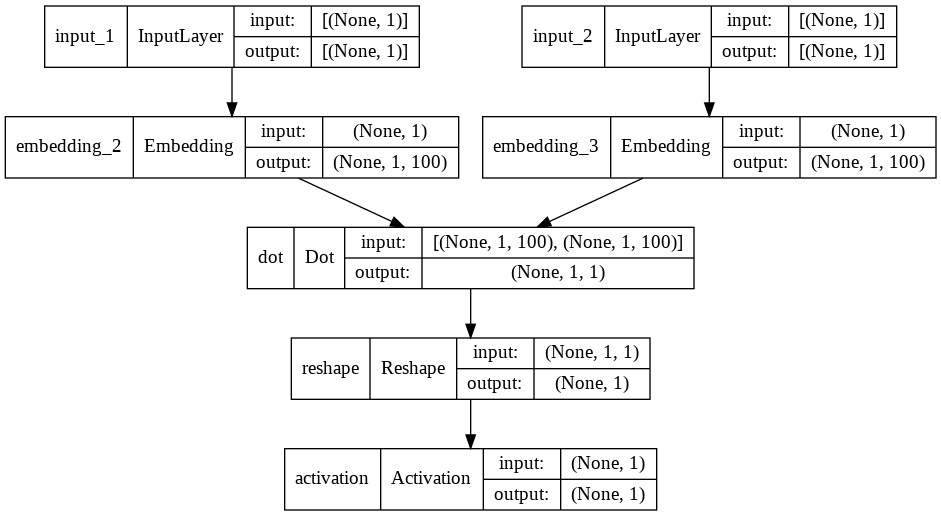

IndexError: ignored

#single and Bi-LSTM 적용

https://dacon.io/competitions/official/235747/codeshare/2907?page=2&dtype=recent

https://wikidocs.net/22933
를 참고하였습니다

https://wikidocs.net/97519

https://wikidocs.net/22933

In [ ]:

from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import Adam

from keras.utils import np_utils

import warnings 
warnings.filterwarnings(action='ignore')

## tokenization

In [ ]:
# 먼저 train 데이터와 test 데이터 인덱스 없이 배열로 만들기
X_train = np.array([x for x in train_merge['title_detok_morph']])
X_test = np.array([x for x in test['title_detok_morph']])
Y_train = np.array([x for x in train_merge['topic_idx']])

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(45654,)
(9131,)
(45654,)


In [ ]:
print('전처리된 리뷰의 최대 길이 : {}'.format(max(len(l) for l in X_train)))
print('전처리된 리뷰의 평균 길이 : {}'.format(sum(map(len, X_train))/len(X_train)))

전처리된 리뷰의 최대 길이 : 46
전처리된 리뷰의 평균 길이 : 24.528606474788628


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


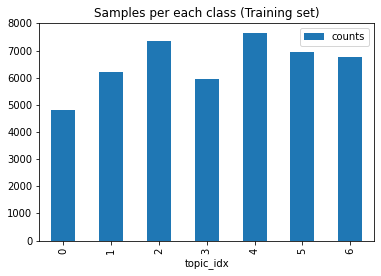

In [ ]:
# 토픽별 분포도 확인 
train.groupby(train.topic_idx).size().reset_index(name="counts").plot.bar(x='topic_idx',title="Samples per each class (Training set)")

In [ ]:
pd.isnull(train_merge).sum()

index                          0
title                          0
topic_idx                      0
cleaned_title                  0
cleaned_title_kor              1
cleaned_title_eng          35390
cleaned_kor_text_length        0
cleaned_eng_text_length        0
title_tagged                   0
title_tagged_cleaned           0
title_noun                     0
title_detok_morph              1
topic                          0
dtype: int64

In [ ]:
train_merge.title_detok_morph = train_merge.title_detok_morph.fillna(method='ffill', limit=1)

In [ ]:
pd.isnull(train_merge).sum()

index                          0
title                          0
topic_idx                      0
cleaned_title                  0
cleaned_title_kor              1
cleaned_title_eng          35390
cleaned_kor_text_length        0
cleaned_eng_text_length        0
title_tagged                   0
title_tagged_cleaned           0
title_noun                     0
title_detok_morph              0
topic                          0
dtype: int64

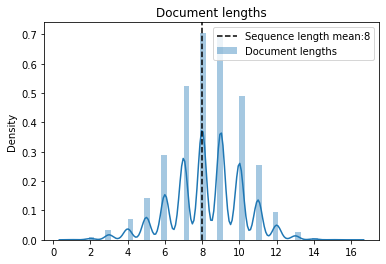

 가장 긴 문장은 16 개의 단어를, 가장 짧은 문장은 1 개의 단어를 가지고 있습니다.


In [ ]:
# 문장 길이 분포도 확인
train_merge['doc_len'] = train_merge.title_detok_morph.apply(lambda words: len(words.split()))

def plot_doc_lengths(dataframe):
    mean_seq_len = np.round(dataframe.doc_len.mean()).astype(int)
    sns.distplot(tuple(dataframe.doc_len), hist=True, kde=True, label='Document lengths')
    plt.axvline(x=mean_seq_len, color='k', linestyle='--', label=f'Sequence length mean:{mean_seq_len}')
    plt.title('Document lengths')
    plt.legend()
    plt.show()
    print(f" 가장 긴 문장은 {train_merge['doc_len'].max()} 개의 단어를, 가장 짧은 문장은 {train_merge['doc_len'].min()} 개의 단어를 가지고 있습니다.")

plot_doc_lengths(train_merge)

In [ ]:
print(X_train)
print(X_test)
print(Y_train)

['인천 핀란드 항공기 결항 휴가철 여행객 분통' '실리콘밸리 넘어서 구글 조원 들여 미국 전역 거점'
 '이란 외무 긴장 완화 해결책 미국 경제 전쟁 멈추' ... '게시판 키움증권 키움 영웅전 실전 투자 대회'
 '답변 배기동 국립 중앙 박물 관장' '한국 인터넷 기자상 시상식 내달 일 개 특별상 김성후']
['유튜브 내달 일 크리에이터 지원 공간 운영' '어버이날 맑 흐려져 남부 지방 옅 황사' '내년 국가 평가 때 논문 건수 반영 않'
 ... '년 전 부마 항쟁 부산 시위 사진 점 최초 공개' '게시판 아리랑 아프리카 개발은행 총회 개회식 중계'
 '유영민 과기 장관 강소 특구 지역 혁신 중심 지원 책 강구']
[4 4 4 ... 1 2 2]


In [ ]:
# 결측값이 있다...??

In [ ]:
pd.isnull(X_train).sum()

0

In [ ]:
# X_train = X_train.fillna(method='ffill', limit=1)

### 정수 인덱싱

In [ ]:
# Tokenizer
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()  
           
tokenizer.fit_on_texts(X_train) # Tokenizer 에 데이터 실제로 입력

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 28003
등장 빈도가 1번 이하인 희귀 단어의 수: 10365
단어 집합에서 희귀 단어의 비율: 37.01389136878191
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.740099029531738


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 17640


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
  # Tokenizer 는 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬해서 
  # num_words 에 지정된 만큼만 숫자로 반환하고, 나머지는 0 으로 반환합니다      
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

print(len(sequences_train), len(sequences_test))

45654 9131


In [ ]:
print(sequences_train[:3])

[[320, 4650, 2363, 4975, 5303, 2559, 8263], [5304, 10979, 305, 753, 9383, 6, 1576, 3027], [52, 650, 874, 686, 5689, 6, 69, 388, 3923]]


In [ ]:
print(sequences_test[:3])

[[1413, 218, 3, 9857, 45, 1442, 331], [1, 935, 10006, 783, 374, 11314, 3091], [119, 162, 469, 272, 3088, 4355, 2217, 107]]


## embedding

리뷰의 최대 길이 : 16
리뷰의 평균 길이 : 8.28560476628554


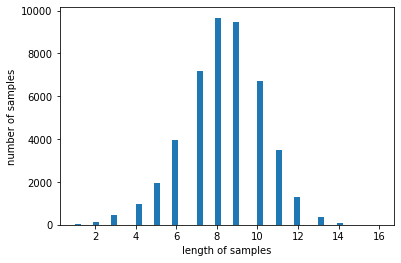

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in sequences_train))
print('리뷰의 평균 길이 :',sum(map(len, sequences_train))/len(sequences_train))
plt.hist([len(review) for review in sequences_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 16
below_threshold_len(max_len, sequences_train)

전체 샘플 중 길이가 16 이하인 샘플의 비율: 100.0


In [ ]:
# 변환된 시퀀스 번호를 이용해 단어 임베딩 벡터 생성
# 정수 인덱싱
word_index = tokenizer.word_index

In [ ]:
# 독립변수 데이터 전처리
  ## 문장의 길이기 제각각이기 때문에 벡터 크기 다 다름
  ## 그러므로 최대 시퀀스 길이 크기(211) 만큼 넉넉하게 늘리고
  ## 패딩(padding) 작업을 통해 나머지 빈 공간을 0으로 채움
  
max_length = 16    # 위에서 그래프 확인 후 정함
padding_type='post'

train_x = pad_sequences(sequences_train, padding='post', maxlen=max_length)
test_x = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

print(train_x.shape, test_x.shape)

(45654, 16) (9131, 16)


In [ ]:
# 종속변수 데이터 전처리
train_y = np_utils.to_categorical(Y_train) # Y_train 에 원-핫 인코딩
print(train_y)
print(train_y.shape)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(45654, 7)


# modeling

### simple rnn

In [ ]:
#파라미터 설정
vocab_size = 17640 # 위에서 구한 사이즈
embedding_dim = 100  
max_length = 16    # 위에서 그래프 확인 후 정함
padding_type='post'

In [ ]:
# Simple RNN 레이어를 사용한 모델 (model1) 정의
model1 = Sequential([Embedding(vocab_size, embedding_dim, input_length =max_length),
        tf.keras.layers.SimpleRNN(units = 64, return_sequences = True),
        tf.keras.layers.SimpleRNN(units = 64, return_sequences = True),
        tf.keras.layers.SimpleRNN(units = 64),
        Dense(7, activation='softmax')    # 결과값이 0~4 이므로 Dense(5)
    ])
    
model1.compile(loss= 'categorical_crossentropy', 
               #여러개 정답 중 하나 맞추는 문제이므로 손실 함수는 categorical_crossentropy
              optimizer= 'adam',
              metrics = ['accuracy']) 
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 16, 100)           1764000   
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 16, 64)            10560     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 16, 64)            8256      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 1,791,527
Trainable params: 1,791,527
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 실행해보기
history = model1.fit(train_x, train_y, epochs=10, batch_size=100, validation_split= 0.2) 
  # 데이터가 50000개가 넘어 학습시간이 오래 걸리기 때문에 batch size 를 100으로 크게 잡았다
  # 추이를 확인하게 위해 일단 10회만 시도

Epoch 1/10
366/366 [==============================] - 19s 44ms/step - loss: 0.7671 - accuracy: 0.7398 - val_loss: 0.8004 - val_accuracy: 0.7182
Epoch 2/10
366/366 [==============================] - 19s 53ms/step - loss: 0.2939 - accuracy: 0.9061 - val_loss: 0.8394 - val_accuracy: 0.7270
Epoch 3/10
366/366 [==============================] - 15s 42ms/step - loss: 0.1415 - accuracy: 0.9552 - val_loss: 1.0111 - val_accuracy: 0.7034
Epoch 4/10
366/366 [==============================] - 15s 42ms/step - loss: 0.0726 - accuracy: 0.9779 - val_loss: 1.0783 - val_accuracy: 0.7120
Epoch 5/10
366/366 [==============================] - 15s 42ms/step - loss: 0.0472 - accuracy: 0.9856 - val_loss: 1.3368 - val_accuracy: 0.6782
Epoch 6/10
366/366 [==============================] - 16s 43ms/step - loss: 0.0400 - accuracy: 0.9878 - val_loss: 1.3222 - val_accuracy: 0.6951
Epoch 7/10
366/366 [==============================] - 16s 42ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 1.5989 - val_accuracy:

<function matplotlib.pyplot.show>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


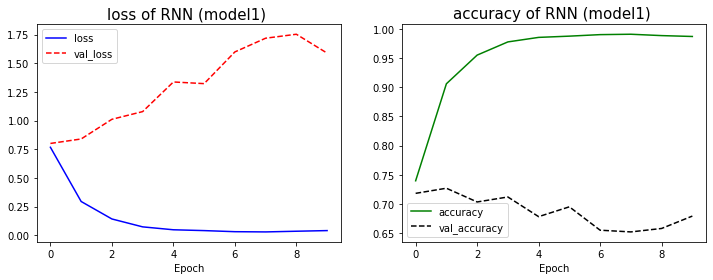

In [ ]:
# 모델 학습 결과 확인
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('loss of RNN (model1) ', fontsize= 15)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('accuracy of RNN (model1) ', fontsize= 15)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

확실히 전처리된 것이 원본을 사용한 것보다 정확도는 높은 것을 알 수 있다
<br>
위에 그림이 전처리 된 것

## 양방향 LSTM

https://wikidocs.net/48920
양방향 LSTM과 어텐션 메커니즘(BiLSTM with Attention mechanism)
어텐션도 가능한가?

In [ ]:
#파라미터 설정
vocab_size = 17640 # 위에서 구한 사이즈
embedding_dim = 100    
max_length = 16    # 위에서 그래프 확인 후 정함
padding_type='post'
#oov_tok = "<OOV>"

In [ ]:
# 양방향 LSTM 레이어를 사용한 모델 (model3) 정의
model3 = Sequential([Embedding(vocab_size, embedding_dim, input_length =max_length),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64)),
        Dense(7, activation='softmax')    # 결과값이 0~4 이므로 Dense(5)
    ])
    
model3.compile(loss= 'categorical_crossentropy', # 여러개 정답 중 하나 맞추는 문제이므로 손실 함수는 categorical_crossentropy
              optimizer= 'adam',
              metrics = ['accuracy']) 
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 16, 100)           1764000   
                                                                 
 bidirectional (Bidirectiona  (None, 16, 128)          84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 16, 128)          98816     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 7)                 903       
                                                      

In [ ]:
# 모델 실행해보기
history = model3.fit(train_x, train_y, epochs=20, batch_size=100, validation_split= 0.2) 
  # 양방향 LSTM 레이어에서는 batch size 를 100으로 잡고 20회 학습 해보았다.

Epoch 1/20
366/366 [==============================] - 87s 202ms/step - loss: 0.8067 - accuracy: 0.7162 - val_loss: 0.8869 - val_accuracy: 0.6842
Epoch 2/20
366/366 [==============================] - 72s 197ms/step - loss: 0.5013 - accuracy: 0.8343 - val_loss: 0.8291 - val_accuracy: 0.6975
Epoch 3/20
366/366 [==============================] - 69s 189ms/step - loss: 0.4505 - accuracy: 0.8512 - val_loss: 0.8042 - val_accuracy: 0.7134
Epoch 4/20
366/366 [==============================] - 69s 188ms/step - loss: 0.4218 - accuracy: 0.8593 - val_loss: 0.7521 - val_accuracy: 0.7418
Epoch 5/20
366/366 [==============================] - 68s 187ms/step - loss: 0.3999 - accuracy: 0.8656 - val_loss: 0.7828 - val_accuracy: 0.7282
Epoch 6/20
366/366 [==============================] - 68s 187ms/step - loss: 0.3762 - accuracy: 0.8722 - val_loss: 0.7723 - val_accuracy: 0.7372
Epoch 7/20
366/366 [==============================] - 68s 187ms/step - loss: 0.3568 - accuracy: 0.8786 - val_loss: 0.8535 - val_ac

<function matplotlib.pyplot.show>

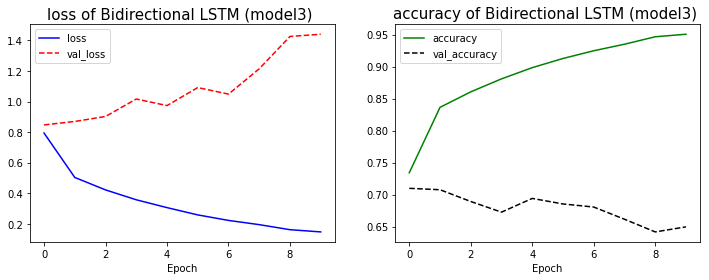

In [ ]:
# 모델 학습 결과 확인
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('loss of Bidirectional LSTM (model3) ', fontsize= 15)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('accuracy of Bidirectional LSTM (model3) ', fontsize= 15)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

### 교차 검증

In [ ]:
# 계층 교차 검증
# without early stopping 
n_fold = 5  
seed = 42

cv = StratifiedKFold(n_splits = n_fold, shuffle=True, random_state=seed)

for i, (i_trn, i_val) in enumerate(cv.split(train_x, Y_train), 1):
    print(f'training model for CV #{i}')

    model3.fit(train_x[i_trn], 
            to_categorical(Y_train[i_trn]),
            validation_data=(train_x[i_val], to_categorical(Y_train[i_val])),
            epochs=10,
            batch_size=512)

training model for CV #1
Epoch 1/10
72/72 [==============================] - 43s 598ms/step - loss: 0.3815 - accuracy: 0.9284 - val_loss: 0.2665 - val_accuracy: 0.9378
Epoch 2/10
72/72 [==============================] - 43s 604ms/step - loss: 0.2009 - accuracy: 0.9511 - val_loss: 0.2511 - val_accuracy: 0.9391
Epoch 3/10
72/72 [==============================] - 43s 602ms/step - loss: 0.1604 - accuracy: 0.9616 - val_loss: 0.2498 - val_accuracy: 0.9392
Epoch 4/10
72/72 [==============================] - 44s 617ms/step - loss: 0.1372 - accuracy: 0.9659 - val_loss: 0.2534 - val_accuracy: 0.9389
Epoch 5/10
72/72 [==============================] - 44s 606ms/step - loss: 0.1200 - accuracy: 0.9701 - val_loss: 0.2586 - val_accuracy: 0.9378
Epoch 6/10
72/72 [==============================] - 43s 599ms/step - loss: 0.1051 - accuracy: 0.9737 - val_loss: 0.2652 - val_accuracy: 0.9370
Epoch 7/10
72/72 [==============================] - 43s 599ms/step - loss: 0.0931 - accuracy: 0.9759 - val_loss: 0.27

In [ ]:
# RNN 계층 교차 검증
n_fold = 5  
seed = 42

cv = StratifiedKFold(n_splits = n_fold, shuffle=True, random_state=seed)

# 테스트데이터의 예측값 담을 곳 생성
test_y = np.zeros((test_x.shape[0], 7))

# 조기 종료 옵션 추가
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3,
                   verbose=1, mode='min', baseline=None, restore_best_weights=True)

for i, (i_trn, i_val) in enumerate(cv.split(train_x, Y_train), 1):
    print(f'training model for CV #{i}')

    model1.fit(train_x[i_trn], 
            to_categorical(Y_train[i_trn]),
            validation_data=(train_x[i_val], to_categorical(Y_train[i_val])),
            epochs=10,
            batch_size=512,
            callbacks=[es])     # 조기 종료 옵션
                      
    test_y += model3.predict(test_x) / n_fold    # 나온 예측값들을 교차 검증 횟수로 나눈다

training model for CV #1
Epoch 1/10
72/72 [==============================] - 11s 156ms/step - loss: 0.2373 - accuracy: 0.9394 - val_loss: 0.2029 - val_accuracy: 0.9414
Epoch 2/10
72/72 [==============================] - 10s 144ms/step - loss: 0.0627 - accuracy: 0.9826 - val_loss: 0.2007 - val_accuracy: 0.9464
Epoch 3/10
72/72 [==============================] - 10s 141ms/step - loss: 0.0231 - accuracy: 0.9941 - val_loss: 0.2155 - val_accuracy: 0.9450
Epoch 4/10
72/72 [==============================] - 9s 126ms/step - loss: 0.0110 - accuracy: 0.9975 - val_loss: 0.2260 - val_accuracy: 0.9460
Epoch 5/10
72/72 [==============================] - 7s 95ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.2344 - val_accuracy: 0.9448
Epoch 00005: early stopping
training model for CV #2
Epoch 1/10
72/72 [==============================] - 7s 98ms/step - loss: 0.0711 - accuracy: 0.9817 - val_loss: 0.0306 - val_accuracy: 0.9915
Epoch 2/10
72/72 [==============================] - 7s 96ms/step - lo

In [ ]:
# 계층 교차 검증
n_fold = 5  
seed = 42

cv = StratifiedKFold(n_splits = n_fold, shuffle=True, random_state=seed)

# 테스트데이터의 예측값 담을 곳 생성
test_y = np.zeros((test_x.shape[0], 7))

# 조기 종료 옵션 추가
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3,
                   verbose=1, mode='min', baseline=None, restore_best_weights=True)

for i, (i_trn, i_val) in enumerate(cv.split(train_x, Y_train), 1):
    print(f'training model for CV #{i}')

    model3.fit(train_x[i_trn], 
            to_categorical(Y_train[i_trn]),
            validation_data=(train_x[i_val], to_categorical(Y_train[i_val])),
            epochs=10,
            batch_size=512,
            callbacks=[es])     # 조기 종료 옵션
                      
    test_y += model3.predict(test_x) / n_fold    # 나온 예측값들을 교차 검증 횟수로 나눈다

training model for CV #1
Epoch 1/10
72/72 [==============================] - 92s 643ms/step - loss: 1.3768 - accuracy: 0.4707 - val_loss: 0.8044 - val_accuracy: 0.7047
Epoch 2/10
72/72 [==============================] - 43s 598ms/step - loss: 0.6633 - accuracy: 0.7751 - val_loss: 0.6148 - val_accuracy: 0.7948
Epoch 3/10
72/72 [==============================] - 43s 597ms/step - loss: 0.5270 - accuracy: 0.8283 - val_loss: 0.5796 - val_accuracy: 0.8086
Epoch 4/10
72/72 [==============================] - 43s 591ms/step - loss: 0.4787 - accuracy: 0.8442 - val_loss: 0.5756 - val_accuracy: 0.8141
Epoch 5/10
72/72 [==============================] - 43s 593ms/step - loss: 0.4478 - accuracy: 0.8531 - val_loss: 0.5840 - val_accuracy: 0.8054
Epoch 6/10
72/72 [==============================] - 42s 584ms/step - loss: 0.4298 - accuracy: 0.8595 - val_loss: 0.5990 - val_accuracy: 0.8082
Epoch 7/10
72/72 [==============================] - 42s 587ms/step - loss: 0.4139 - accuracy: 0.8623 - val_loss: 0.60

In [ ]:
# 테스트 데이터의 예측값 확인
test_y

array([[0.14262776, 0.14193246, 0.14286925, ..., 0.14241582, 0.14558597,
        0.14242591],
       [0.14236065, 0.1418791 , 0.14306163, ..., 0.14243519, 0.14537381,
        0.14253306],
       [0.14262137, 0.14217618, 0.14330551, ..., 0.14190523, 0.14468545,
        0.143198  ],
       ...,
       [0.14274652, 0.14171387, 0.14288642, ..., 0.14311723, 0.14485018,
        0.14263322],
       [0.14255887, 0.14192996, 0.14283595, ..., 0.14256002, 0.14534416,
        0.14225128],
       [0.14255777, 0.14229749, 0.14281705, ..., 0.14295752, 0.14435813,
        0.14207224]])

In [ ]:
topic = []
for i in range(len(test_y)):
    topic.append(np.argmax(test_y[i]))

In [ ]:
submission

,index,topic_idx
0,45654,5
1,45655,5
2,45656,5
3,45657,5
4,45658,5
...,...,...
9126,54780,5
9127,54781,5
9128,54782,5
9129,54783,5


In [ ]:
tmp_pred = model1.predict(test_x)
pred = np.argmax(tmp_pred, axis = 1)

In [ ]:
submission.topic_idx = pred
submission.sample(3)

,index,topic_idx
6317,51971,5
1330,46984,5
8134,53788,3


In [ ]:
# sample_submission 에 대입
submission['topic_idx'] = topic
submission

,index,topic_idx
0,45654,5
1,45655,5
2,45656,5
3,45657,5
4,45658,5
...,...,...
9126,54780,5
9127,54781,5
9128,54782,5
9129,54783,5


In [ ]:
Submission_PATH = './Submission/'

In [ ]:
submission.to_csv(Submission_PATH + '20220201_RNN_2.csv',index = False)

## 바다나우 어텐션(Bahdanau Attention) 추가

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
import os

In [ ]:
class AttentionLayer(Layer):
    """
    Hierarchial Attention Layer as described by Hierarchical Attention Networks for Document Classification(2016)
    - Yang et. al.
    Source: https://www.cs.cmu.edu/~hovy/papers/16HLT-hierarchical-attention-networks.pdf
    Theano backend
    """
    def __init__(self,attention_dim=100,return_coefficients=False,**kwargs):
        # Initializer 
        self.supports_masking = True
        self.return_coefficients = return_coefficients
        self.init = initializers.get('glorot_uniform') # initializes values with uniform distribution
        self.attention_dim = attention_dim
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Builds all weights
        # W = Weight matrix, b = bias vector, u = context vector
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)),name='W')
        self.b = K.variable(self.init((self.attention_dim, )),name='b')
        self.u = K.variable(self.init((self.attention_dim, 1)),name='u')
        self.trainable_weights = [self.W, self.b, self.u]

        super(AttentionLayer, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, hit, mask=None):
        # Here, the actual calculation is done
        uit = K.bias_add(K.dot(hit, self.W),self.b)
        uit = K.tanh(uit)
        
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)
        ait = K.exp(ait)
        
        if mask is not None:
            ait *= K.cast(mask, K.floatx())

        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = hit * ait
        
        if self.return_coefficients:
            return [K.sum(weighted_input, axis=1), ait]
        else:
            return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        if self.return_coefficients:
            return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[-1], 1)]
        else:
            return input_shape[0], input_shape[-1]

NameError: ignored

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len))
model.add(Bidirectional(LSTM(32, return_sequences=False)))
model.add(attention(return_sequences=True)) # receive 3D and output 2D
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

NameError: ignored

In [ ]:
import tensorflow as tf

class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query): # 단, key와 value는 같음
    # query shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # score 계산을 위해 뒤에서 할 덧셈을 위해서 차원을 변경해줍니다.
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
print(max_len)

print(vocab_size)

16
17640


In [ ]:
sequence_input = Input(shape=(max_len,), dtype='int32')
embedded_sequences = Embedding(vocab_size, 
                               128, input_length=max_len, 
                               mask_zero = True)(sequence_input)

In [ ]:
lstm = Bidirectional(LSTM(64, dropout=0.5, return_sequences = True))(embedded_sequences)

In [ ]:
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional \
  (LSTM(64, dropout=0.5, return_sequences=True, return_state=True))(lstm)

In [ ]:
print(lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape)

(None, 16, 128) (None, 64) (None, 64) (None, 64) (None, 64)


In [ ]:
state_h = Concatenate()([forward_h, backward_h]) # 은닉 상태
state_c = Concatenate()([forward_c, backward_c]) # 셀 상태

In [ ]:
attention = BahdanauAttention(64) # 가중치 크기 정의
context_vector, attention_weights = attention(lstm, state_h)

In [ ]:
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation="softmax")(dropout)
model6 = Model(inputs=sequence_input, outputs=output)

In [ ]:
model6.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model6.fit(train_x, train_y, epochs = 3, batch_size = 256, validation_split= 0.2, verbose=1)

Epoch 1/3


InvalidArgumentError: ignored

## FASTTEXT 적용

FastText는 하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주, 서브워드(subword)를 고려하여 학습

아래의 코드는 gensim의 fast text를 활용 

In [ ]:
from gensim.models import FastText

In [ ]:
!pip3 install fasttext
import fasttext

     |████████████████████████████████| 68 kB 3.0 MB/s 
  Using cached pybind11-2.9.1-py2.py3-none-any.whl (211 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3138116 sha256=15c63f547b92ef1e69cbf37430b5d3f918bc06583f347bef66604acfbda55dbc
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
data_train  = train_merge['title_detok_morph']

In [ ]:
data_test  = test.title_detok_morph

In [ ]:
data_train

0                 인천 핀란드 항공기 결항 휴가철 여행객 분통
1              실리콘밸리 넘어서 구글 조원 들여 미국 전역 거점
2              이란 외무 긴장 완화 해결책 미국 경제 전쟁 멈추
3        클린턴 측근 한국 기업 특수 관계 조명 공과 사 맞물려 종합
4                시진핑 트럼프 중미 무역 협상 조속 타결 희망
                       ...                
45649               금융 미국 스티펠 제휴 선진국 시장 공략
45650      보 서울시 교육청 신종 코로나 확산 개학 연기 휴업 검토
45651             게시판 키움증권 키움 영웅전 실전 투자 대회
45652                   답변 배기동 국립 중앙 박물 관장
45653        한국 인터넷 기자상 시상식 내달 일 개 특별상 김성후
Name: title_detok_morph, Length: 45654, dtype: object

In [ ]:
data_test

0                유튜브 내달 일 크리에이터 지원 공간 운영
1                  어버이날 맑 흐려져 남부 지방 옅 황사
2                  내년 국가 평가 때 논문 건수 반영 않
3             김명자 신임 과 회장 원로 젊 과학자 지혜 모을
4             회색 인간 작가 김동식 심 백 등 소설 집 출간
                      ...               
9126                인천 오후 시 분 대설주의보 눈 쌓여
9127         노래방 지인 성추행 외교부 사무관 구속 입건 종합
9128          년 전 부마 항쟁 부산 시위 사진 점 최초 공개
9129         게시판 아리랑 아프리카 개발은행 총회 개회식 중계
9130    유영민 과기 장관 강소 특구 지역 혁신 중심 지원 책 강구
Name: title_detok_morph, Length: 9131, dtype: object

In [ ]:
data_train = data_train.astype(str)
data_test = data_test.astype(str)

In [ ]:
# 문자열 split list로 convert

data_train = data_train.apply(lambda words: words.split())

data_test = data_test.apply(lambda words: words.split())

In [ ]:
data_train

0                     [인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]
1                 [실리콘밸리, 넘어서, 구글, 조원, 들여, 미국, 전역, 거점]
2                [이란, 외무, 긴장, 완화, 해결책, 미국, 경제, 전쟁, 멈추]
3        [클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 사, 맞물려, 종합]
4                   [시진핑, 트럼프, 중미, 무역, 협상, 조속, 타결, 희망]
                             ...                      
45649                   [금융, 미국, 스티펠, 제휴, 선진국, 시장, 공략]
45650       [보, 서울시, 교육청, 신종, 코로나, 확산, 개학, 연기, 휴업, 검토]
45651                 [게시판, 키움증권, 키움, 영웅전, 실전, 투자, 대회]
45652                        [답변, 배기동, 국립, 중앙, 박물, 관장]
45653          [한국, 인터넷, 기자상, 시상식, 내달, 일, 개, 특별상, 김성후]
Name: title_detok_morph, Length: 45654, dtype: object

In [ ]:
# result = [sentence.split() for sentence in str]

In [ ]:
# model = FastText(result, size=100, window=5, min_count=5, workers=4, sg=1)
#
# 임베딩 학습을 시키려면 리스트 내 split 토큰화가 진행되어야 함 
# 형태소 단위로 구성된 리스트가 되었습니다 => fast text input 데이터로 활용이 가능하다 

In [ ]:
# model.wv.most_similar("서울")

- fasttext 모델의 입력값 형태로 만들기 위해 데이터를 메모장 파일로 저장합니다.
- 이후 data_train 파일로 fasttext 모델을 훈련시킵니다. (초모수 설정은 이명호님의 석사 학위 논문 '단어 임
베딩과 LSTM을 활용한 비속어 판별 방법'을 참고하였습니다.)

In [ ]:
with open('data_train.txt', "w") as f:
  for i in range(len(data_train)):
    f.write(' '.join(data_train.iloc[i])+'\n')
  f.close()


In [ ]:
with open('data_test.txt', "w") as f:
  for i in range(len(data_test)):
    f.write(' '.join(data_test.iloc[i])+'\n')
  f.close()

In [ ]:
# fast text 의 인풋은 파일 경로가 되어야 한다
# input must be a filepath. The input text does not need to be tokenized
# as per the tokenize function, but it must be preprocessed and encoded as UTF-8. 

model = fasttext.train_supervised('./data_train.txt', dim = 100, ws = 3, minCount = 100)

In [ ]:
data_train

0                     [인천, 핀란드, 항공기, 결항, 휴가철, 여행객, 분통]
1                 [실리콘밸리, 넘어서, 구글, 조원, 들여, 미국, 전역, 거점]
2                [이란, 외무, 긴장, 완화, 해결책, 미국, 경제, 전쟁, 멈추]
3        [클린턴, 측근, 한국, 기업, 특수, 관계, 조명, 공과, 사, 맞물려, 종합]
4                   [시진핑, 트럼프, 중미, 무역, 협상, 조속, 타결, 희망]
                             ...                      
45649                   [금융, 미국, 스티펠, 제휴, 선진국, 시장, 공략]
45650       [보, 서울시, 교육청, 신종, 코로나, 확산, 개학, 연기, 휴업, 검토]
45651                 [게시판, 키움증권, 키움, 영웅전, 실전, 투자, 대회]
45652                        [답변, 배기동, 국립, 중앙, 박물, 관장]
45653          [한국, 인터넷, 기자상, 시상식, 내달, 일, 개, 특별상, 김성후]
Name: title_detok_morph, Length: 45654, dtype: object

In [ ]:
data_test

0                    [유튜브, 내달, 일, 크리에이터, 지원, 공간, 운영]
1                      [어버이날, 맑, 흐려져, 남부, 지방, 옅, 황사]
2                     [내년, 국가, 평가, 때, 논문, 건수, 반영, 않]
3               [김명자, 신임, 과, 회장, 원로, 젊, 과학자, 지혜, 모을]
4              [회색, 인간, 작가, 김동식, 심, 백, 등, 소설, 집, 출간]
                            ...                     
9126                    [인천, 오후, 시, 분, 대설주의보, 눈, 쌓여]
9127            [노래방, 지인, 성추행, 외교부, 사무관, 구속, 입건, 종합]
9128           [년, 전, 부마, 항쟁, 부산, 시위, 사진, 점, 최초, 공개]
9129             [게시판, 아리랑, 아프리카, 개발은행, 총회, 개회식, 중계]
9130    [유영민, 과기, 장관, 강소, 특구, 지역, 혁신, 중심, 지원, 책, 강구]
Name: title_detok_morph, Length: 9131, dtype: object

- Tokenizer를 이용해서 data_train/data_test 에 있는 고유한 단어에 번호를 할당합니다.
- 즉, data_train/data_test 를 정수 인덱싱 벡터로 변환하는 것입니다.
- 모든 문장의 단어 벡터 길이는 같아야 됩니다. 같지 않는 경우, 0으로 패딩해서 길이를 맞춰줍니다.
- 따라서 모든 문장에서 최대 단어 벡터 길이를 구한 후 패딩합니다.

In [ ]:
#정수인덱싱과정
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_train)
vocab_size=len(tokenizer.word_index)+1
data_train = tokenizer.texts_to_sequences(data_train)
data_test = tokenizer.texts_to_sequences(data_test)

#모든 문장에서 가장 긴 단어 벡터 길이 구하기
max_len=max(len(l) for l in data_train)

#max_len에 맞춰서 패딩하기
X_train = pad_sequences(data_train, maxlen = max_len)
X_test = pad_sequences(data_test, maxlen = max_len)

In [ ]:
X_train

array([[    0,     0,     0, ...,  5302,  2558,  8262],
       [    0,     0,     0, ...,     5,  1575,  3026],
       [    0,     0,     0, ...,    68,   387,  3922],
       ...,
       [    0,     0,     0, ...,  2111,    36,    82],
       [    0,     0,     0, ...,   670, 12284,  4067],
       [    0,     0,     0, ...,    29, 10106, 28002]], dtype=int32)

In [ ]:
X_test

array([[    0,     0,     0, ...,    44,  1441,   330],
       [    0,     0,     0, ...,   373, 11313,  3090],
       [    0,     0,     0, ...,  4354,  2216,   106],
       ...,
       [    0,     0,     0, ...,   109,   551,    61],
       [    0,     0,     0, ...,  1439,  5196,  1077],
       [    0,     0,     0, ...,    44,   417,  4372]], dtype=int32)

- 학습시킨 fasttext model로 data_train을 구성하는 각 단어의 구성 벡터를 구합니다.
- 모두 합친 벡터를 embedding_matrix라고 합니다.

In [ ]:
#임베딩행렬 구하기
dd=list(tokenizer.word_index.keys()) # 행을 담당
embedding_matrix=[np.zeros(shape=(100,),dtype=float)] # 열을 담당

for i in range(len(dd)):
  embedding_matrix.append(model.get_word_vector(dd[i]))

embedding_matrix=np.array(embedding_matrix)

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00238093,  0.00509113,  0.00831976, ...,  0.00242033,
        -0.00682412, -0.00715008],
       [ 0.00730021, -0.00806438, -0.00091569, ...,  0.00525279,
         0.00587604,  0.0088221 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
embedding_matrix.shape
# data train을 구성하는 고유의 단어 수 = 28003
# 벡터 차원 100

(28003, 100)

In [ ]:
target = pd.get_dummies(train['topic_idx']).values # 토픽별 원 핫 벡터 추출 
x_train=X_train
x_test = X_test
y_train=target

In [ ]:
target

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

- 뉴스 기사의 주제 분류를 목적으로 분석하기 때문에 'topic_idx'를 Y변수로 놓습니다.
- topic_idx를 더미 변수로 변환합니다.
- 앞에서 구한 embedding_matrix를 임베딩 계층의 가중치로 입력할 것입니다.

In [ ]:
max_len=16
# 아래 그래프에서 max length 16으로 설정
vocab_size=28003
embedding_dim = 100
model_5=Sequential([
Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],input_length=max_len,trainable = True),
tf.keras.layers.Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2,return_sequences=True)),
tf.keras.layers.Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2,return_sequences=True)),
tf.keras.layers.Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
Dense(7, activation='softmax')])


- Keras는 인공 신경망 층을 구성하기 위해 Sequential()을 사용합니다.
- 첫번째 층은 Embedding 계층으로, 정수 인덱싱한 x_train 을 밀집 벡터로 맵핑합니다.
- 설명드리자면, 이 밀집 벡터는 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련됩니다. 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트 됩니다.
- 두번째 층은 Bidirectional 계층이 감싼 LSTM 계층으로, 첫번째 요소값 100은 LSTM 계층을 거치며 출력될
차원값을 의미합니다.
- 세 개의 Bi-LSTM 계층을 쌓은 후 나오는 결과에 softmax함수를 적용합니다.
- 이를 통해 각 관측값이 7개의 주제에 할당될 확률을 구할 수 있습니다

In [ ]:
model_5.compile(loss= 'categorical_crossentropy', # 여러개 정답 중 하나 맞추는 문제이므로 손실 함수는 categorical_crossentropy
              optimizer= 'adam',
              metrics = ['accuracy']) 
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 16, 100)           2800300   
                                                                 
 bidirectional_3 (Bidirectio  (None, 16, 128)          84480     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 16, 128)          98816     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                      

https://3months.tistory.com/424

- Early Stopping 의 개념과 Keras 를 통한 구현
- Earlystopping 을 하는 것은 특정 시점에 모델의 트레이닝을 멈춤으로써, 모델의 validation error 가 더 이상 낮아지지 않도록 조절할 수는 있겠지만, 중지된 상태가 최고의 모델은 아닐 것이다. 따라서 가장 validation performance 가 좋은 모델을 저장하는 것이 필요한데, keras 에서는 이를 위해 ModelCheckpoint 라고 하는 객체를 존재한다
- 이 객체는 validation error 를 모니터링하면서, 이전 epoch 에 비해 validation performance 가 좋은 경우, 무조건 이 때의 parameter 들을 저장한다. 이를 통해 트레이닝이 중지되었을 때, 가장 validation performance 가 높았던 모델을 반환할 수 있다. 


In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True, verbose=1)

In [ ]:
# 모델 실행해보기
history = model_5.fit(x_train, y_train, 
                      epochs=30, batch_size=100, 
                      validation_split= 0.2,
                      callbacks=[es, mc]
                      ) 
  # 양방향 LSTM 레이어에서는 batch size 를 100으로 잡고 30회 학습 해보았다.
  # early stopping threshold는 epoch = 30 으로 잡았다. 

Epoch 1/30
104/366 [=======>......................] - ETA: 1:25 - loss: 1.3420 - accuracy: 0.4437

KeyboardInterrupt: ignored

In [ ]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1000)

from tensorflow.keras.utils import to_categorical
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model_5.fit(X_train, y_train, epochs=10, callbacks=[es, mc], 
#                       validation_data=(X_valid,y_valid), batch_size =100, validation_split = 0.2)
history = model_5.fit(X_train, y_train, epochs=10,  
                      validation_data=(X_valid,y_valid), batch_size =100, validation_split = 0.2)



Epoch 1/10
293/293 [==============================] - 158s 390ms/step - loss: 0.8617 - accuracy: 0.6883 - val_loss: 0.5152 - val_accuracy: 0.8323
Epoch 2/10
293/293 [==============================] - 99s 337ms/step - loss: 0.3372 - accuracy: 0.8934 - val_loss: 0.5271 - val_accuracy: 0.8281
Epoch 3/10
293/293 [==============================] - 96s 328ms/step - loss: 0.1990 - accuracy: 0.9391 - val_loss: 0.6067 - val_accuracy: 0.8207
Epoch 4/10
293/293 [==============================] - 94s 321ms/step - loss: 0.1470 - accuracy: 0.9542 - val_loss: 0.6756 - val_accuracy: 0.8145
Epoch 5/10
293/293 [==============================] - 94s 321ms/step - loss: 0.1080 - accuracy: 0.9671 - val_loss: 0.7415 - val_accuracy: 0.8120
Epoch 6/10
293/293 [==============================] - 93s 318ms/step - loss: 0.0867 - accuracy: 0.9729 - val_loss: 0.7543 - val_accuracy: 0.8123
Epoch 7/10
293/293 [==============================] - 94s 322ms/step - loss: 0.0708 - accuracy: 0.9773 - val_loss: 0.8853 - val_a

In [ ]:
sample_sub = pd.read_csv('./sample_submission.csv')

In [ ]:
Submission_PATH = './Submission/'

In [ ]:
predictions = model_5.predict(x_test)

pred_1=[]

for p in predictions:
  pred_1.append(np.argmax(p))

sample_sub['topic_idx']=pred_1
sample_sub.to_csv(Submission_PATH +'Fasttext와 3개_BILSTM계층_2.csv',index=False)

In [ ]:
sample_sub['topic_idx']

0       2
1       3
2       2
3       2
4       3
       ..
9126    3
9127    2
9128    3
9129    2
9130    2
Name: topic_idx, Length: 9131, dtype: int64

<function matplotlib.pyplot.show>

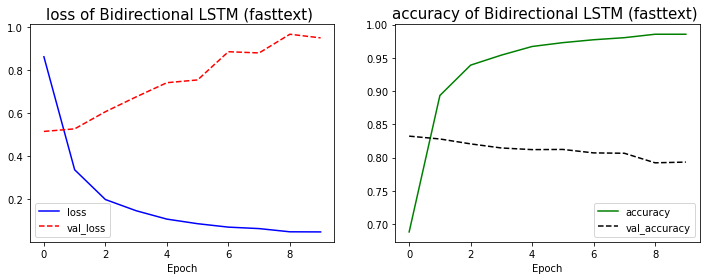

In [ ]:
# 모델 학습 결과 확인
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('loss of Bidirectional LSTM (fasttext) ', fontsize= 15)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('accuracy of Bidirectional LSTM (fasttext) ', fontsize= 15)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

- fast text로 처리하는 것이 더 높은 정확도와 더 낮은 loss를 보여준다